<h1><center>Cycle Power Plant</center></h1>
<p>Below given is the python example of Linear Regression which trains and predict the net hourly electrical energy output from a Combined Cycle Power Plant. The dataset was taken from the link <a href="https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant">here</a></p>

<p>
<h5>The below given is the explanation about the variables in the dataset</h5>
<i>The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.</i></p>
<h5>Dataset variable description</h5>
<img src="https://github.com/sneha-cg/ML/blob/main/Linear%20Regression/Cycle%20Power%20Plant/ccpp_params.PNG?raw=true" alt="Parameter definition" />

<b>Import required libraries</b>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

<b>Read data from the downloaded xlsx file</b>

In [2]:
df = pd.read_excel('cpp.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


From above info we can understand that none of the features are having null values and all are continuous.

<b>Split the dataset into features (X) and target variable (Y)</b>

In [3]:
X = df.drop(['PE'], axis=1).values
Y = df['PE']

<b>Split the data into training and testing sets</b>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<b>Create a Linear Regression model</b>

In [5]:
algo = LinearRegression()

<b>Train the model</b>

In [6]:
algo.fit(X_train, Y_train)

LinearRegression()

<b>Predict with the test data</b>

In [7]:
Y_pred = algo.predict(X_test)

In [8]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Test Prediction using known features. Here we have tried to predict the energy output for the first row in the above datas. The prediction output is 467.348 and actual output was 463.26 which means the prediction seems to be approximately near to the actual value.

In [9]:
algo.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

In [13]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20.36838300288591
R-squared: 0.9304112159477683


In [14]:
Y.min(), Y.max()

(420.26, 495.76)

The r2 score is 93% which means the model is predicting the values better. Here, the mean squared error is 20.36 which is a lower value when compared to the target value that ranges from 420 to 495.

<b>Plot the actual verses predicted graph</b>

Text(0.5, 1.0, 'Actual vs. Predicted')

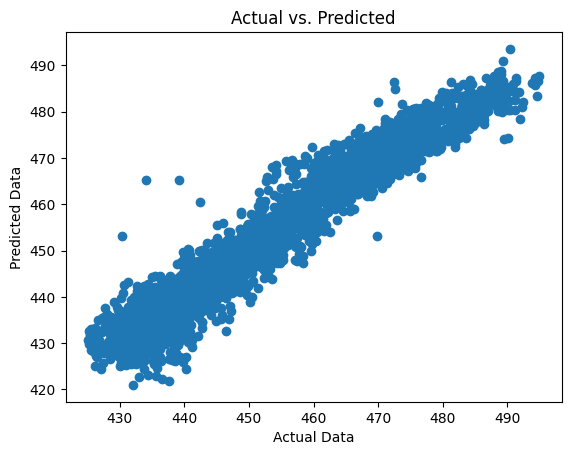

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual vs. Predicted")

From the graph we can see that there is no much difference, and most of the predicted values are pretty much close to the actual values.